<a href="https://colab.research.google.com/github/alouvre/MLT_DicodingSubmission_Proyek_Akhir_Sistem_Rekomedasi/blob/main/MLT_Submission_Proyek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir : Sistem Rekomendasi Destinasi Wisata di Indonesia

## **A. Project Overview**

### Latar Belakang



<br>

📚 Referensi:


## **B. Business Understanding**

### Problem Statements

Berdasarkan latar belakang di atas, berikut ini merupakan rincian masalah yang dapat diselesaikan pada proyek ini:
- **Bagaimana cara memberikan rekomendasi destinasi wisata yang relevan berdasarkan deskripsi dan kategori konten?**

    Destinasi yang direkomendasikan harus sesuai dengan preferensi pengguna, dengan mempertimbangkan informasi yang ada pada deskripsi dan kategori destinasi, seperti budaya, alam, atau kategori lainnya. Tantangan ini memerlukan solusi yang dapat memanfaatkan informasi detail tentang setiap tempat.

- **Bagaimana cara menggunakan data rating pengguna untuk meningkatkan akurasi rekomendasi?**

    Sistem rekomendasi perlu memperhitungkan rating yang diberikan oleh pengguna sebelumnya untuk meningkatkan kualitas rekomendasi yang disarankan.

- **Bagaimana cara mengukur relevansi rekomendasi agar sistem dapat memberikan hasil yang tepat?**

    Sistem rekomendasi harus mampu memberikan hasil yang sesuai dengan kebutuhan pengguna. Oleh karena itu, diperlukan metrik evaluasi yang efektif untuk memantau dan mengukur sejauh mana sistem mampu menghasilkan rekomendasi yang relevan dan tepat sasaran.

### Goals/Tujuan

- **Membangun sistem rekomendasi berbasis konten yang efisien dengan memanfaatkan deskripsi dan kategori destinasi wisata.**

    Menggunakan informasi yang terdapat pada deskripsi dan kategori destinasi untuk mencocokkan rekomendasi dengan minat pengguna yang sudah pernah mengunjungi tempat wisata tertentu.

- **Mengembangkan sistem rekomendasi destinasi wisata berdasarkan pola penilaian pengguna.**

    Membangun sistem rekomendasi yang mempertimbangkan interaksi dan rating pengguna, untuk memastikan rekomendasi mencerminkan pengalaman dan preferensi pengguna lainnya.

- **Menilai kinerja sistem rekomendasi dengan menggunakan metrik evaluasi yang relevan.**

    Metrik evaluasi akan digunakan untuk memonitor relevansi, akurasi, dan konsistensi dari hasil rekomendasi yang diberikan oleh sistem.

### Solution Statement

Untuk mencapai tujuan proyek, dilakukan serangkaian pendekatan sebagai berikut:


---

## **1. Import Library yang Dibutuhkan**

In [ ]:
# !pip install lazypredict

In [1]:
# ==========================
# 🔗 Mount Google Drive & Navigasi ke Folder Proyek
# ==========================
from google.colab import drive
import os  # Untuk navigasi dan pengelolaan path
import shutil
import zipfile

# ==========================
# ⚙️ Konfigurasi Umum
# ==========================
import pandas as pd
import numpy as np
import random
import warnings

# Konfigurasi warning & seed
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

seed = 0
np.random.seed(seed)
random.seed(seed)

# ==========================
# 📊 Visualization
# ==========================
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 🧠 Machine Learning & Preprocessing
# ==========================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

# ==========================
# 🤖 Machine Learning Models
# ==========================
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# ==========================
# 📦 Utility Libraries
# ==========================
# from lazypredict.Supervised import LazyClassifier
from google.colab import files

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import numpy as np
import joblib

import kagglehub
import shutil
import os

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/MLT/Proyek_Akhir'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/MLT/Proyek_Akhir


## **2. Data Understanding**

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

### **2.1. Informasi Dataset**

 Dataset `Indonesia Tourism Destination` yang digunakan pada proyek ini diambil pada laman [Kaggle](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data). Dataset ini ditujukan untuk membangun sistem rekomendasi tempat wisata berdasarkan preferensi pengguna serta parameter seperti kota, harga, kategori, dan waktu. Dataset ini berisi data tempat wisata di `5 kota besar di Indonesia, yaitu Jakarta, Yogyakarta, Semarang, Bandung, dan Surabaya`.

| Jenis      | Keterangan                                                                            |
| ---------- | ------------------------------------------------------------------------------------- |
| Title      | Indonesia Tourism Destination                                                         |
| Source     | [Kaggle](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data) |
| Maintainer | [A_Prabowo](https://www.kaggle.com/datasets/aprabowo)                                 |
| License    | Data files © Original Authors                                                         |
| Visibility | Publik                                                                                |
| Tags       | Beginner, Travel, Asia, Recommender Systems                                           |
| Usability  | 8.24                                                                                  |


### **2.2. Karakteristik Dataset**

Dataset yang digunakan pada proyek ini, yaitu `tourism_with_id.csv` dan `tourism_rating.csv`.

1. `tourism_with_id.csv`
    Berisi informasi detail mengenai tempat wisata di lima kota besar Indonesia. Terdapat total 437 tempat wisata.

    Kolom-kolom pada file ini antara lain:
    - `Place_Id` : Identifikasi unik untuk setiap destinasi wisata.
    - `Place_Name` : Nama destinasi wisata.
    - `Description` : Deskripsi singkat tentang destinasi.
    - `Category` : Kategori destinasi (misalnya: Budaya, Alam).
    - `City` : Kota tempat destinasi berada.
    - `Price` : Harga tiket masuk.
    - `Rating` : Rating rata-rata dari pengguna (0-5).
    - `Time_Minutes` : Waktu yang dibutuhkan untuk mengunjungi (dalam menit).
    - `Coordinate`: Koordinat geografis.
    - `Lat`: Latitude lokasi.
    - `Long` : Longitude lokasi.
    - `Unnamed: 11` : Kolom kosong.
    - `Unnamed: 12` : Nilai duplikat dari Place_id.


2. `tourism_rating.csv`
    Digunakan sebagai data interaksi antara pengguna dan tempat wisata, yang akan digunakan dalam sistem rekomendasi berbasis rating. Terdapat 10.000 data rating pengguna terhadap destinasi wisata tertentu.

    Kolom-kolom pada file ini:
    - `User_Id` : ID unik untuk setiap pengguna yang memberi rating.
    - `Place_Id` : ID untuk setiap destinasi wisata yang diberi rating.
    - `Rating` : Rating yang diberikan oleh pengguna terhadap destinasi wisata (0-5).

**Insight:**
- **Relasi antar dataset**
    - `Place_Id` pada `tourism_rating.csv` berfungsi sebagai foreign key yang menghubungkan ke `Place_Id` pada `tourism_with_id.csv`. Ini memungkinkan integrasi data antara informasi destinasi wisata dengan data interaksi pengguna (rating), sehingga kita bisa menganalisis preferensi pengguna berdasarkan karakteristik destinasi.

- **`User_Id` pada `tourism_rating.csv` memungkinkan kita untuk:**
    - Melakukan analisis perilaku pengguna secara individual, misalnya memahami pola penilaian mereka terhadap berbagai kategori destinasi.
    - Membentuk segmentasi pengguna berdasarkan preferensi, yang bermanfaat untuk personalisasi rekomendasi, misalnya menyarankan destinasi wisata berdasarkan kecenderungan rating pengguna yang mirip.

### **2.3. Mengambil Data Dari Kaggle**

In [ ]:
# Path tujuan akhir di Google Drive
final_dir = "/content/drive/MyDrive/MLT/Proyek_Akhir/dataset"
os.makedirs(final_dir, exist_ok=True)

def download_kaggle_dataset_to_drive(dataset_id: str, target_dir: str):
    try:
        # Unduh dataset ke path default kagglehub
        source_path = kagglehub.dataset_download(dataset_id)
        print(f"✅ Dataset berhasil diunduh: {dataset_id}")
        print(f"📂 Lokasi awal: {source_path}")
        print("🔄 Memindahkan ke folder Google Drive...")

        # Pindahkan isi folder ke target_dir
        for filename in os.listdir(source_path):
            src = os.path.join(source_path, filename)
            dst = os.path.join(target_dir, filename)
            shutil.copy2(src, dst)

        print(f"✅ Dataset berhasil dipindahkan ke: {target_dir}")
        print("📌 Isi folder:", os.listdir(target_dir))

    except Exception as e:
        print(f"❌ Gagal download atau pindah dataset: {dataset_id}")
        print(f"📌 Error: {e}")

# Eksekusi
download_kaggle_dataset_to_drive("aprabowo/indonesia-tourism-destination", final_dir)

✅ Dataset berhasil diunduh: aprabowo/indonesia-tourism-destination
📂 Lokasi awal: /kaggle/input/indonesia-tourism-destination
🔄 Memindahkan ke folder Google Drive...
✅ Dataset berhasil dipindahkan ke: /content/drive/MyDrive/MLT/Proyek_Akhir/dataset
📌 Isi folder: ['user.csv', 'tourism_rating.csv', 'package_tourism.csv', 'tourism_with_id.csv']


### **2.4. Memuat Data**

Dataset diimpor ke dalam lingkungan kerja menggunakan pustaka Pandas dan disusun dalam format dataframe. Proses ini bertujuan untuk memastikan data dapat diakses dan diolah dengan lebih mudah dalam proses analisis selanjutnya.

In [3]:
# Path folder dataset
url = "/content/drive/MyDrive/MLT/Proyek_Akhir/dataset"

# Load keempat dataset ke dalam dataframe dengan nama yang informatif
df_tourism      = pd.read_csv(f"{url}/tourism_with_id.csv")          # Data wisata
df_users        = pd.read_csv(f"{url}/user.csv")                     # Data pengguna
df_ratings      = pd.read_csv(f"{url}/tourism_rating.csv")           # Rating antar user dan tempat
# df_packages     = pd.read_csv(f"{url}/package_tourism.csv")          # Rekomendasi paket

print('Jumlah data informasi tempat wisata:', len(df_tourism.Place_Id.unique()))
print('Jumlah data pengguna ', len(df_users.User_Id.unique()))
print('Jumlah data pengguna yang memberi rating:', len(df_ratings.User_Id.unique()))
print('Jumlah total rating yang tercatat :', len(df_ratings))

Jumlah data informasi tempat wisata: 437
Jumlah data pengguna  300
Jumlah data pengguna yang memberi rating: 300
Jumlah total rating yang tercatat : 10000


In [ ]:
df_tourism.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [ ]:
df_ratings.head(2)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2


In [ ]:
df_users.head(2)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21


### **2.5. Data Assessing**

Pemeriksaan data ini dilakukan dengan menjalankan proses assessing data yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

Setelah data berhasil dikumpulkan, dilakukan evaluasi kualitas data melalui beberapa pengecekan penting, yaitu:

- `Duplikasi Data`
    
    Dilakukan pemeriksaan apakah terdapat baris data yang tercatat lebih dari satu kali. Data duplikat dapat memperkenalkan bias dalam pelatihan model dan perlu dihapus.

- `Missing Values`

    Dicek apakah terdapat nilai kosong (missing) pada kolom-kolom penting. Kehadiran nilai kosong dapat menurunkan kualitas model dan, jika ditemukan, perlu ditangani melalui imputasi atau penghapusan.

- `Duplikasi Kolom`

    Dilakukan pengecekan apakah terdapat kolom yang memuat informasi yang sama (kolom duplikat), karena keberadaan kolom seperti ini dapat menyebabkan redundansi dan perlu dihapus untuk efisiensi.

#### **2.5.1. Cek Duplikasi Data**

In [4]:
# Cek duplikat berdasarkan Place_Id
duplicate_place_id = df_tourism[df_tourism.duplicated('Place_Id', keep=False)]

# Cek duplikat berdasarkan Place_Name
duplicate_place_name = df_tourism[df_tourism.duplicated('Place_Name', keep=False)]

In [5]:
print("Mengecek Duplikat berdasarkan Place_Id:")
duplicate_place_id

Mengecek Duplikat berdasarkan Place_Id:


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12


In [6]:
print("Mengecek Duplikat berdasarkan Place_Name:")
duplicate_place_name

Mengecek Duplikat berdasarkan Place_Name:


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12


In [7]:
# Cek duplikat berdasarkan kombinasi User_Id dan Place_Id
duplicate_user_place = df_ratings[df_ratings.duplicated(['User_Id', 'Place_Id'], keep=False)]

print("Mengecek Duplikat User_Id dan Place_Id:")
duplicate_user_place

Mengecek Duplikat User_Id dan Place_Id:


,User_Id,Place_Id,Place_Ratings
25,1,328,2
29,1,328,2
42,2,437,5
46,2,208,5
47,2,437,4
...,...,...,...
9952,299,290,5
9972,299,407,5
9976,300,69,4
9978,300,69,3


#### **2.5.2. Cek Missing Value**

In [8]:
# Cek missing values untuk tourism_with_id.csv
print("Nissing values pada tourism_with_id.csv:")
print((df_tourism.isnull().sum()))
print("\n")

# Cek missing values untuk tourism_rating.csv
print("Missing values pada tourism_rating.csv:")
print((df_ratings.isnull().sum()))

Nissing values pada tourism_with_id.csv:
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


Missing values pada tourism_rating.csv:
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


#### **2.5.3. Cek Duplikasi Kolom**

Untuk mengecek apakah kolom `Place_Id` dan `Unnamed: 12` merupakan duplikat (memuat nilai yang sama persis), dilakukan pemeriksaan dengan membandingkan seluruh isi kedua kolom. Pemeriksaan ini bertujuan untuk memastikan bahwa kolom `Unnamed: 12` tidak memuat informasi baru yang berbeda dari `Place_Id`, sehingga dapat dipertimbangkan untuk dihapus.

In [9]:
# Cek apakah semua nilai di Place_Id dan Unnamed: 12 sama persis
(df_tourism['Place_Id'] == df_tourism['Unnamed: 12']).all()

np.True_

Hasil dari pemeriksaan diatas adalah `True`, yang berarti seluruh nilai pada kolom `Unnamed: 12` identik dengan `Place_Id`. Dengan demikian, kolom `Unnamed: 12` dipastikan redundant (duplikat) dan dapat dihapus tanpa kehilangan informasi penting.

#### **2.5.4. Hasil Assessing**

Berdasarkan hasil evaluasi:

- Kualitas Duplikasi

  - Dataset `df_tourism`
      
    - Tidak ditemukan data duplikat berdasarkan `Place_Id` maupun `Place_Name`, sehingga `seluruh data destinasi wisata bersifat unik` dan tidak memerlukan proses deduplikasi.

    - Selain itu, dilakukan pengecekan terhadap kolom `Place_Id` dan `Unnamed: 12`. Kolom `Unnamed: 12` memiliki isi yang identik dengan `Place_Id`, sehingga dapat dihapus karena redundan.

  - Dataset `df_ratings`

    Tidak ditemukan data duplikat pada kombinasi `User_Id` dan `Place_Id`. `Setiap pasangan user dan destinasi yang dirating dianggap unik`. Oleh karena itu, tidak diperlukan proses deduplikasi.

- Kualitas Missing Values

  - Dataset `df_tourism`

    Terdapat missing values pada kolom `Time_Minutes` sebanyak 232 baris, serta kolom `Unnamed: 11` yang seluruh isinya kosong (437 baris).

    - Kolom `Unnamed: 11` dapat dihapus karena seluruh data pada kolom ini kosong dan tidak mengandung informasi yang berguna.

    - Missing values pada `Time_Minutes` dapat dihapus Karena terdapat banyak missing values (232 baris) dan informasi waktu kunjungan ini tidak menjadi fokus utama dalam sistem rekomendasi berbasis rating.

  - Dataset `df_ratings`

    Tidak ditemukan missing values di seluruh kolom, sehingga tidak memerlukan langkah tambahan seperti imputasi atau penghapusan data.




## **3. Exploratory Data Analysis**

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

In [ ]:
# df_loan_eda = df_loan.copy()

---

### 3.1. EDA - Deskripsi Variabel

#### **Data Tourism**

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Dari eksekusi method `df_loan.info()` terdapat:

- Terdapat 8 kolom numerik dengan tipe data `int64` dan `float64` yaitu: `Place_Id`, `Price`, `Rating`, `Time_Minutes`, `Lat`, `Long`, `Unnamed: 11`, `Unnamed: 12`.
- Terdapat 5 kolom dengan tipe data `object` yaitu: `Place_Name`, `Description`, `Category`, `City`, `Coordinate`.

In [ ]:
df_tourism.describe(include="all")

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437,437,437,437,437.000000,437.000000,205.000000,437,437.000000,437.000000,0.0,437.000000
unique,NaN,437,437,6,5,NaN,NaN,NaN,437,NaN,NaN,NaN,NaN
top,NaN,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Taman Hiburan,Yogyakarta,NaN,NaN,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",NaN,NaN,NaN,NaN
freq,NaN,1,1,135,126,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
mean,219.000000,NaN,NaN,NaN,NaN,24652.173913,4.442792,82.609756,NaN,-7.095438,109.160142,NaN,219.000000
std,126.295289,NaN,NaN,NaN,NaN,66446.374709,0.208587,52.872339,NaN,0.727241,1.962848,NaN,126.295289
min,1.000000,NaN,NaN,NaN,NaN,0.000000,3.400000,10.000000,NaN,-8.197894,103.931398,NaN,1.000000
25%,110.000000,NaN,NaN,NaN,NaN,0.000000,4.300000,45.000000,NaN,-7.749590,107.578369,NaN,110.000000
50%,219.000000,NaN,NaN,NaN,NaN,5000.000000,4.500000,60.000000,NaN,-7.020524,110.237468,NaN,219.000000
75%,328.000000,NaN,NaN,NaN,NaN,20000.000000,4.600000,120.000000,NaN,-6.829411,110.431869,NaN,328.000000


Fungsi `describe(include="all")` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah nilai non-null (tidak kosong) pada kolom tersebut. Berlaku untuk semua jenis data.
- `Mean` adalah nilai rata-rata. Hanya muncul pada kolom bertipe numerik.
- `Std` adalah standar deviasi (seberapa tersebar data dari rata-rata). Hanya muncul untuk kolom numerik.
- `Min` yaitu nilai minimum dari setiap kolom numerik.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum pada kolom numerik.
- `Unique` adalah	jumlah nilai unik (berbeda) dalam kolom. Hanya muncul untuk kolom kategorikal/objek.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom kategorikal.
- `Freq` adalah frekuensi kemunculan nilai top. Berapa kali nilai tersebut muncul.

In [ ]:
df_tourism.shape

(437, 13)

Dari eksekusi method `df_tourism.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 437 | 13 |

<br>

#### **Data User**

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Dari eksekusi method `df_loan.info()` terdapat:

- Terdapat 2 kolom numerik dengan tipe data `int64` dan `float64` yaitu: `User_Id` dan `Age`.
- Terdapat 1 kolom dengan tipe data `object` yaitu: `Location`.

In [ ]:
df_users.describe(include="all")

,User_Id,Location,Age
count,300.000000,300,300.000000
unique,NaN,28,NaN
top,NaN,"Bekasi, Jawa Barat",NaN
freq,NaN,39,NaN
mean,150.500000,NaN,28.700000
std,86.746758,NaN,6.393716
min,1.000000,NaN,18.000000
25%,75.750000,NaN,24.000000
50%,150.500000,NaN,29.000000
75%,225.250000,NaN,34.000000


Fungsi `describe(include="all")` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah nilai non-null (tidak kosong) pada kolom tersebut. Berlaku untuk semua jenis data.
- `Mean` adalah nilai rata-rata. Hanya muncul pada kolom bertipe numerik.
- `Std` adalah standar deviasi (seberapa tersebar data dari rata-rata). Hanya muncul untuk kolom numerik.
- `Min` yaitu nilai minimum dari setiap kolom numerik.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum pada kolom numerik.
- `Unique` adalah	jumlah nilai unik (berbeda) dalam kolom. Hanya muncul untuk kolom kategorikal/objek.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom kategorikal.
- `Freq` adalah frekuensi kemunculan nilai top. Berapa kali nilai tersebut muncul.

In [ ]:
df_users.shape

(300, 3)

Dari eksekusi method `df_tourism.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 300 | 3 |

<br>

#### **Data Rating**

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Dari eksekusi method `df_loan.info()` terdapat:

- Terdapat 3 kolom numerik dengan tipe data `int64` dan `float64` yaitu: `User_Id`, `Place_Id`, dan `Place_Ratings`.

In [ ]:
df_ratings.describe(include="all")

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Fungsi `describe(include="all")` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah nilai non-null (tidak kosong) pada kolom tersebut. Berlaku untuk semua jenis data.
- `Mean` adalah nilai rata-rata. Hanya muncul pada kolom bertipe numerik.
- `Std` adalah standar deviasi (seberapa tersebar data dari rata-rata). Hanya muncul untuk kolom numerik.
- `Min` yaitu nilai minimum dari setiap kolom numerik.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum pada kolom numerik.
- `Unique` adalah	jumlah nilai unik (berbeda) dalam kolom. Hanya muncul untuk kolom kategorikal/objek.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom kategorikal.
- `Freq` adalah frekuensi kemunculan nilai top. Berapa kali nilai tersebut muncul.

In [ ]:
# Menampilkan jumlah duplikasi sebelum dihapus
print("Jumlah Duplikasi Sebelum Dihapus:", df_ratings.duplicated().sum())

# Menghapus duplikasi
df_ratings = df_ratings.drop_duplicates()

# Menampilkan jumlah duplikasi setelah dihapus
print("Jumlah Duplikasi Setelah Dihapus:", df_ratings.duplicated().sum())

Jumlah Duplikasi Sebelum Dihapus: 79
Jumlah Duplikasi Setelah Dihapus: 0


In [ ]:
df_ratings.shape

(9921, 3)

Dari eksekusi method `df_tourism.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 9921 | 3 |

<br>

### 3.2. Univariate Analysis

#### Categorical Features

In [ ]:
def plot_kategori(df, feature, warna='purple'):
    """
    Menampilkan jumlah dan persentase kategori serta plot batang dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom kategorikal.
    warna (str): Warna untuk bar chart (default = 'orange').
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_summary = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\nRingkasan untuk kolom: {feature}")
    print(df_summary)
    print("\n")

    print("Visualisasi:")
    count.plot(kind='bar', title=feature, color=warna)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### **Fitur 1 - Category**


Ringkasan untuk kolom: Category
                    Jumlah Sampel  Persentase (%)
Category                                         
Taman Hiburan                 135            30.9
Budaya                        117            26.8
Cagar Alam                    106            24.3
Bahari                         47            10.8
Tempat Ibadah                  17             3.9
Pusat Perbelanjaan             15             3.4


Visualisasi:


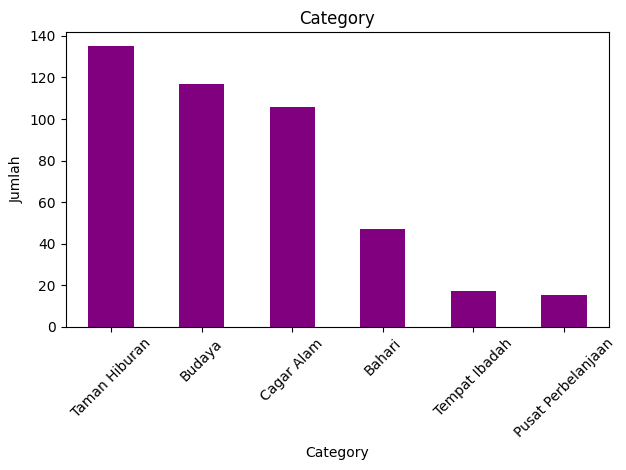

In [ ]:
plot_kategori(df_tourism, 'Category')

##### **Fitur 2 - City**


Ringkasan untuk kolom: City
            Jumlah Sampel  Persentase (%)
City                                     
Yogyakarta            126            28.8
Bandung               124            28.4
Jakarta                84            19.2
Semarang               57            13.0
Surabaya               46            10.5


Visualisasi:


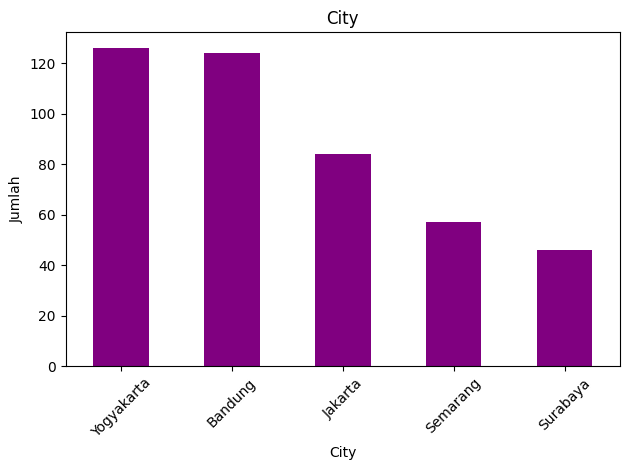

In [ ]:
plot_kategori(df_tourism, 'City')

##### **Fitur 3 - Place_Name**


 Ringkasan 10 Tempat Wisata dengan Rating Terbanyak:
                                  Place_Name  Rating_Count  Persentase (%)
0                             Gunung Lalakon            39             0.4
1                        Pantai Parangtritis            39             0.4
2  Gereja Perawan Maria Tak Berdosa Surabaya            38             0.4
3                             Pantai Kesirat            37             0.4
4                         Taman Sungai Mudal            36             0.4
5                    Kampung Batu Malakasari            34             0.3
6              Geoforest Watu Payung Turunan            34             0.3
7                            Grand Maerakaca            33             0.3
8                                 Taman Film            33             0.3
9                       NuArt Sculpture Park            33             0.3




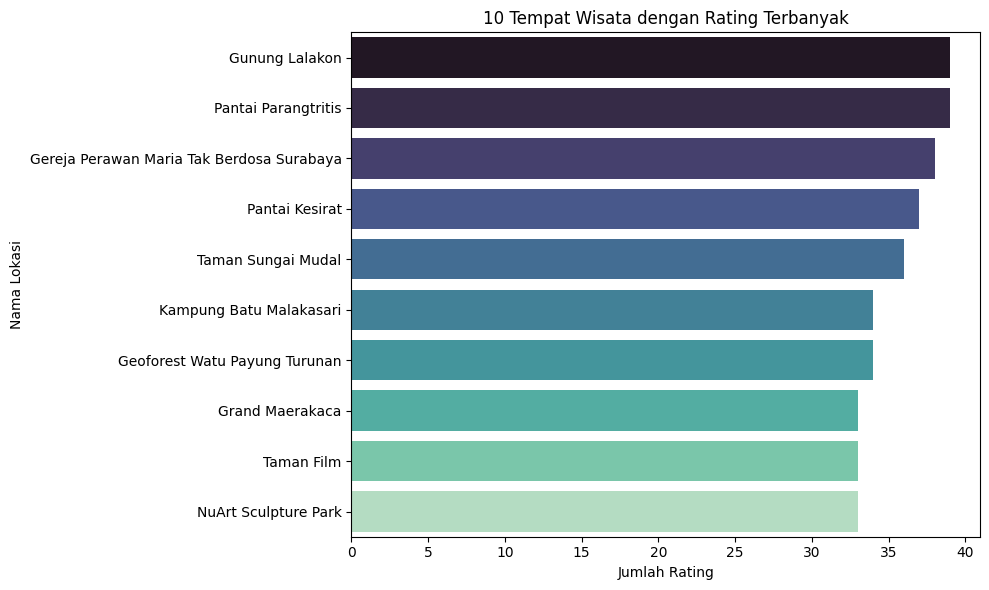

In [ ]:
# Hitung jumlah rating untuk setiap Place_Id
top_10 = df_ratings['Place_Id'].value_counts().reset_index()[0:10]
# Ganti nama kolom biar jelas
top_10.columns = ['Place_Id', 'Rating_Count']
# Gabungkan dengan nama tempat dari df_tourism
top_10 = pd.merge(top_10, df_tourism[['Place_Id', 'Place_Name']], on='Place_Id', how='left')

# Hitung persentase
total_rating = df_ratings['Place_Id'].count()
top_10['Persentase (%)'] = round(100 * top_10['Rating_Count'] / total_rating, 1)

# Tampilkan ringkasan
print("\n Ringkasan 10 Tempat Wisata dengan Rating Terbanyak:")
print(top_10[['Place_Name', 'Rating_Count', 'Persentase (%)']])
print("\n")

# Visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(10,6))
sns.barplot(x='Rating_Count', y='Place_Name', data=top_10, palette='mako')
plt.title('10 Tempat Wisata dengan Rating Terbanyak')
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Lokasi')
plt.tight_layout()
plt.show()

#### Numerical Features

##### **Fitur 1 - Rating**


Ringkasan untuk kolom: Rating
        Jumlah Sampel  Persentase (%)
Rating                               
4.5                98            22.4
4.4                98            22.4
4.6                75            17.2
4.3                47            10.8
4.7                37             8.5
4.2                20             4.6
4.1                20             4.6
4.0                18             4.1
4.8                10             2.3
5.0                 4             0.9
4.9                 4             0.9
3.9                 3             0.7
3.8                 2             0.5
3.4                 1             0.2


Visualisasi:


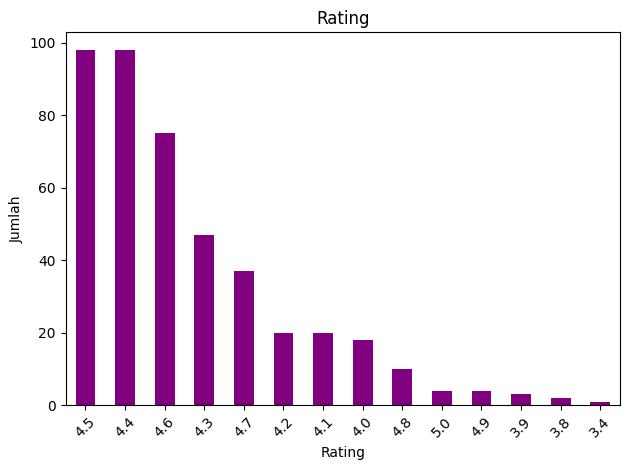

In [ ]:
plot_kategori(df_tourism, 'Rating')

##### **Analisis Distribusi Fitur Numerik**

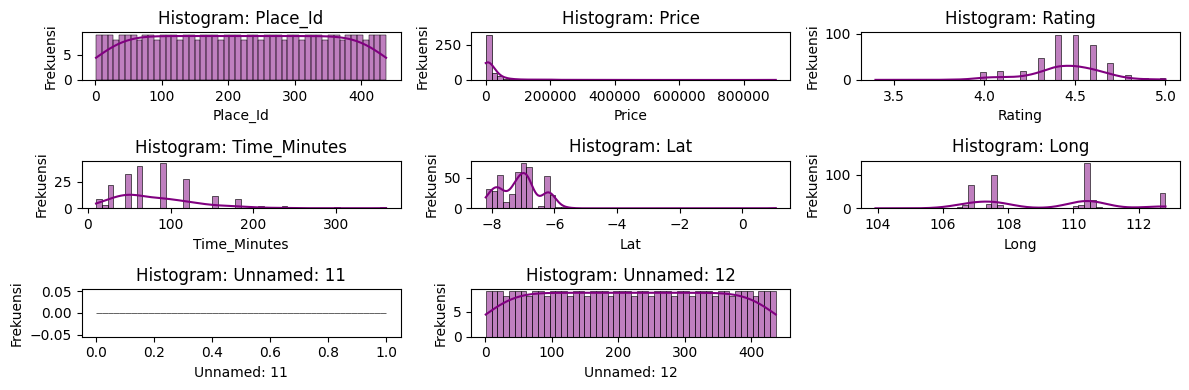

In [ ]:
def plot_histogram_semua_kolom(df, bins=50, figsize=(12, 4), color='purple'):
    """
    Menampilkan histogram dari semua kolom numerik di dalam dataframe menggunakan seaborn.histplot.

    Parameters:
    df (DataFrame): DataFrame yang akan diplot.
    bins (int): Jumlah bin pada histogram.
    figsize (tuple): Ukuran figure.
    color (str): Warna histogram.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3 kolom per baris

    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.histplot(df[col], bins=bins, kde=True, color=color)
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
    plt.show()

plot_histogram_semua_kolom(df_tourism)

## **4. Data Preparation**

### 4.1. Menghapus Kolom Yang Tidak Diperlukan

In [ ]:
# Membuang kolom yang tidak dipakai
df_tourism = df_tourism.drop(['Time_Minutes','Coordinate','Lat','Long','Unnamed: 11','Unnamed: 12'],axis=1)

# Tampilkan setelah kolom 'Time_Minutes','Coordinate','Lat','Long','Unnamed: 11','Unnamed: 12' di-drop
df_tourism.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6


### 4.2. Menggabungkan Data

In [ ]:
df_tourism_rating = pd.merge(
    df_ratings,
    df_tourism[["Place_Id", "Place_Name", "Description", "City", "Category"]],
    on='Place_Id',
    how='left'
)

df_tourism_rating

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9916,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9917,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9918,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9919,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [ ]:
df_tourism_rating['city_category'] = df_tourism_rating[['City','Category']].agg(' '.join, axis=1)

df_tourism_rating

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9916,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9917,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9918,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9919,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


### 4.2. Menangani Missing Value

Penting untuk memastikan bahwa dataset yang digunakan berada dalam kondisi bersih. Dua hal utama yang perlu dicek dalam tahap awal ini adalah:
- Duplikasi Data – apakah terdapat baris data yang terduplikasi.
- Missing Values – apakah ada nilai kosong atau hilang yang dapat mempengaruhi kualitas analisis.

In [ ]:
# Menampilkan jumlah duplikasi
print("Jumlah Duplikasi:", df_tourism_rating.duplicated().sum())

Jumlah Duplikasi: 0


In [ ]:
print("Memeriksa jumlah nilai yang hilang di setiap kolom:")
missing_values = df_tourism_rating.isnull().sum()
missing_values

Memeriksa jumlah nilai yang hilang di setiap kolom:


,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Description,0
City,0
Category,0
city_category,0


Dapat disimpulkan bahwa dataframe `df_tourism` tidak memiliki nilai yang hilang dalam setiap kolomnya. Hal ini menunjukkan bahwa data yang tersedia cukup bersih dan siap untuk dianalisis lebih lanjut tanpa perlu dilakukan imputasi atau pembersihan tambahan terkait missing values.

## **5. Model Development**

### **Content Based Filtering**

In [ ]:
df_tourism_rating_cbf = df_tourism_rating.copy()

#### **TF-IDF Vectorizer**

Pada tahap ini, kita akan membangun sistem rekomendasi sederhana berdasarkan jenis destinasi tempat wisata.  TF-IDF Vectorizer ini akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori destinasi tempat wisata.

Sama seperti proyek sentiment analysis, pada proyek ini, kita juga menggunakan fungsi `tfidfvectorizer()` dari library sklearn.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi CountVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan cv pada data df_tourism_rating_cbf
tf.fit(df_tourism_rating_cbf['city_category'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['alam', 'bahari', 'bandung', 'budaya', 'cagar', 'hiburan',
       'ibadah', 'jakarta', 'perbelanjaan', 'pusat', 'semarang',
       'surabaya', 'taman', 'tempat', 'yogyakarta'], dtype=object)

In [ ]:
tfidf_matrix = tf.transform(df_tourism_rating_cbf['city_category'])

tfidf_matrix.shape

(9921, 15)

In [ ]:
# Mengubah vektor cv dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.6967427 ],
        [0.        , 0.72948931, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.53693927, 0.        ,
         0.        ],
        ...,
        [0.59031168, 0.        , 0.55051271, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.35121599, ..., 0.        , 0.66206017,
         0.        ],
        [0.59103826, 0.        , 0.        , ..., 0.        , 0.        ,
         0.54895133]])

In [ ]:
# Membuat dataframe untuk melihat cv matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns= tf.get_feature_names_out(),
    index = df_tourism_rating_cbf.Place_Name
).sample(22)

,alam,bahari,bandung,budaya,cagar,hiburan,ibadah,jakarta,perbelanjaan,pusat,semarang,surabaya,taman,tempat,yogyakarta
Place_Name,,,,,,,,,,,,,,,
Monumen Bandung Lautan Api,0.000000,0.000000,0.698201,0.715902,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
Water Park Bandung Indah,0.000000,0.000000,0.589318,0.000000,0.000000,0.571272,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.571272,0.0,0.000000
Pantai Siung,0.000000,0.820333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.571887
Studio Alam Gamplong,0.000000,0.000000,0.000000,0.000000,0.000000,0.572078,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.572078,0.0,0.587752
Watu Gunung Ungaran,0.529963,0.000000,0.000000,0.000000,0.529963,0.000000,0.0,0.000000,0.0,0.0,0.662027,0.000000,0.000000,0.0,0.000000
Wisata Lereng Kelir,0.529963,0.000000,0.000000,0.000000,0.529963,0.000000,0.0,0.000000,0.0,0.0,0.662027,0.000000,0.000000,0.0,0.000000
Taman Barunawati,0.000000,0.000000,0.000000,0.000000,0.000000,0.487053,0.0,0.000000,0.0,0.0,0.000000,0.724954,0.487053,0.0,0.000000
GunungTangkuban perahu,0.590312,0.000000,0.550513,0.000000,0.590312,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
Taman Miniatur Kereta Api,0.000000,0.000000,0.589318,0.000000,0.000000,0.571272,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.571272,0.0,0.000000


#### Cosine Similarity¶

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)

cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.38247783],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.19334887,
        0.69779357],
       [0.        , 0.        , 0.        , ..., 0.19334887, 1.        ,
        0.        ],
       [0.38247783, 0.        , 0.        , ..., 0.69779357, 0.        ,
        1.        ]])

In [ ]:
type(cosine_sim)

numpy.ndarray

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama destinasi wisata
cosine_sim_df = pd.DataFrame(cosine_sim,index=df_tourism_rating_cbf['Place_Name'],columns=df_tourism_rating_cbf['Place_Name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap destinasi wisata
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9921, 9921)


Place_Name,Kampung Pelangi,Pulau Pramuka,Puncak Gunung Api Purba - Nglanggeran,Pasar Beringharjo,Sanghyang Heuleut
Place_Name,,,,,
Bukit Jamur,0.000000,0.000000,0.697794,0.000000,1.000000
Jakarta Planetarium,0.543124,0.413276,0.000000,0.000000,0.000000
Hutan Kota Srengseng,0.543124,0.413276,0.000000,0.000000,0.000000
Trans Studio Bandung,0.577852,0.000000,0.000000,0.000000,0.324427
Museum Ullen Sentalu,0.000000,0.000000,0.382478,0.243704,0.000000
Rumah Sipitung,0.000000,0.478503,0.000000,0.000000,0.000000
Monumen Jalesveva Jayamahe,0.000000,0.000000,0.000000,0.000000,0.000000
Pemandian Air Panas Ciater,0.000000,0.000000,0.697794,0.000000,1.000000
Pantai Patihan,0.000000,0.633623,0.313938,0.200032,0.000000


#### Recommendation

In [ ]:
df_tourism_rating_cbf.columns

Index(['User_Id', 'Place_Id', 'Place_Ratings', 'Place_Name', 'Description',
       'City', 'Category', 'city_category'],
      dtype='object')

In [ ]:
def tourism_recommendations(place_name, similarity_data=cosine_sim_df,
                            items=df_tourism_rating_cbf[['User_Id', 'Place_Id', 'Place_Name', 'Category', 'Description', 'City', 'Place_Ratings']], k=5):
    """
    Rekomendasi Tempat Wisata berdasarkan kemiripan dataframe
    """

    # Validasi apakah nama tempat ada di data
    if place_name not in similarity_data.columns:
        print(f"Tempat '{place_name}' tidak ditemukan dalam data.")
        return pd.DataFrame()

    # Ambil skor similarity sebagai Series
    similarity_scores = similarity_data[place_name]

    # Pastikan similarity_scores adalah Series, bukan DataFrame
    if isinstance(similarity_scores, pd.DataFrame):
        similarity_scores = similarity_scores.iloc[:, 0]  # ambil kolom pertama

    # Hilangkan diri sendiri dari kandidat
    similarity_scores = similarity_scores.drop(labels=[place_name], errors='ignore')

    # Urutkan berdasarkan similarity tertinggi
    top_places = similarity_scores.sort_values(ascending=False).head(k)



    # --- RECOMMENDATION LOGIC ---
    # Ambil detail dari items, using .loc[] with unique index
    rekomendasi = items.loc[items['Place_Name'].isin(top_places.index)].copy()

    # Reset index of top_places
    top_places = top_places.reset_index()
    top_places.columns = ['Place_Name', 'similarity'] # Rename for merging

    # Merge to get similarity score
    rekomendasi = pd.merge(rekomendasi, top_places, on='Place_Name', how='left')

    # Drop duplicates based on Place_Name, 'Description', and 'City', keeping the first ---
    rekomendasi = rekomendasi.drop_duplicates(subset=['Place_Name', 'Description', 'City'], keep='first')

    # --- LIMIT TO TOP K ---
    # 1. Filter by similarity
    rekomendasi = rekomendasi[rekomendasi['similarity'] > 0].sort_values(by=['similarity'], ascending=False)

    # 2. Select the top k recommendations
    rekomendasi = rekomendasi.head(k).reset_index(drop=True)

    # Urutkan hasil akhir
    return rekomendasi.sort_values(by='similarity', ascending=False).reset_index(drop=True)

In [ ]:
# Mendapatkan rekomendasi destinasi wisata yang mirip dengan Candi Ratu Boko
tourism_recommendations("Candi Ratu Boko")

,User_Id,Place_Id,Place_Name,Category,Description,City,Place_Ratings,similarity
0,1,89,De Mata Museum Jogja,Budaya,Museum De Mata merupakan salah satu museum yan...,Yogyakarta,3,1.0
1,3,118,Museum Sonobudoyo Unit I,Budaya,Museum Sonobudoyo adalah museum dan perpustaka...,Yogyakarta,2,1.0
2,3,86,Keraton Yogyakarta,Budaya,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Yogyakarta,4,1.0
3,6,121,Candi Prambanan,Budaya,Candi Prambanan atau Candi Roro Jonggrang (bah...,Yogyakarta,4,1.0


In [ ]:
# Mendapatkan rekomendasi destinasi wisata yang mirip dengan Trans Studio Bandung
tourism_recommendations("Trans Studio Bandung")

,User_Id,Place_Id,Place_Name,Category,Description,City,Place_Ratings,similarity
0,3,283,Jembatan Pasupati,Taman Hiburan,Jembatan Pasupati atau Jalan Layang Pasupati a...,Bandung,3,1.0
1,3,227,Alun-Alun Kota Bandung,Taman Hiburan,Alun-alun Bandung adalah pusat kota Bandung ya...,Bandung,2,1.0
2,6,224,Dago Dreampark,Taman Hiburan,Dago Dreampark merupakan wisata kekinian di Ko...,Bandung,5,1.0
3,13,245,Jendela Alam,Taman Hiburan,Tidak hanya menikmati alam sekitar yang masih ...,Bandung,4,1.0
4,51,276,Taman Jomblo,Taman Hiburan,Taman Jomblo dapat mengacu kepada:\n\nTaman Pa...,Bandung,4,1.0


### **Content Based Filtering**

In [ ]:
df_tourism_rating_cbf = df_tourism_rating.copy()

#### **TF-IDF Vectorizer**

Pada tahap ini, kita akan membangun sistem rekomendasi sederhana berdasarkan jenis destinasi tempat wisata.  TF-IDF Vectorizer ini akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori destinasi tempat wisata.

Sama seperti proyek sentiment analysis, pada proyek ini, kita juga menggunakan fungsi `tfidfvectorizer()` dari library sklearn.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi CountVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan cv pada data df_tourism_rating_cbf
tf.fit(df_tourism_rating_cbf['city_category'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['alam', 'bahari', 'bandung', 'budaya', 'cagar', 'hiburan',
       'ibadah', 'jakarta', 'perbelanjaan', 'pusat', 'semarang',
       'surabaya', 'taman', 'tempat', 'yogyakarta'], dtype=object)

In [ ]:
tfidf_matrix = tf.transform(df_tourism_rating_cbf['city_category'])

tfidf_matrix.shape

(9921, 15)

In [ ]:
# Mengubah vektor cv dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.6967427 ],
        [0.        , 0.72948931, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.53693927, 0.        ,
         0.        ],
        ...,
        [0.59031168, 0.        , 0.55051271, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.35121599, ..., 0.        , 0.66206017,
         0.        ],
        [0.59103826, 0.        , 0.        , ..., 0.        , 0.        ,
         0.54895133]])

In [ ]:
# Membuat dataframe untuk melihat cv matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns= tf.get_feature_names_out(),
    index = df_tourism_rating_cbf.Place_Name
).sample(22)

,alam,bahari,bandung,budaya,cagar,hiburan,ibadah,jakarta,perbelanjaan,pusat,semarang,surabaya,taman,tempat,yogyakarta
Place_Name,,,,,,,,,,,,,,,
Monumen Bandung Lautan Api,0.000000,0.000000,0.698201,0.715902,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
Water Park Bandung Indah,0.000000,0.000000,0.589318,0.000000,0.000000,0.571272,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.571272,0.0,0.000000
Pantai Siung,0.000000,0.820333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.571887
Studio Alam Gamplong,0.000000,0.000000,0.000000,0.000000,0.000000,0.572078,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.572078,0.0,0.587752
Watu Gunung Ungaran,0.529963,0.000000,0.000000,0.000000,0.529963,0.000000,0.0,0.000000,0.0,0.0,0.662027,0.000000,0.000000,0.0,0.000000
Wisata Lereng Kelir,0.529963,0.000000,0.000000,0.000000,0.529963,0.000000,0.0,0.000000,0.0,0.0,0.662027,0.000000,0.000000,0.0,0.000000
Taman Barunawati,0.000000,0.000000,0.000000,0.000000,0.000000,0.487053,0.0,0.000000,0.0,0.0,0.000000,0.724954,0.487053,0.0,0.000000
GunungTangkuban perahu,0.590312,0.000000,0.550513,0.000000,0.590312,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
Taman Miniatur Kereta Api,0.000000,0.000000,0.589318,0.000000,0.000000,0.571272,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.571272,0.0,0.000000


#### Cosine Similarity¶

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)

cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.38247783],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.19334887,
        0.69779357],
       [0.        , 0.        , 0.        , ..., 0.19334887, 1.        ,
        0.        ],
       [0.38247783, 0.        , 0.        , ..., 0.69779357, 0.        ,
        1.        ]])

In [ ]:
type(cosine_sim)

numpy.ndarray

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama destinasi wisata
cosine_sim_df = pd.DataFrame(cosine_sim,index=df_tourism_rating_cbf['Place_Name'],columns=df_tourism_rating_cbf['Place_Name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap destinasi wisata
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9921, 9921)


Place_Name,Kampung Pelangi,Pulau Pramuka,Puncak Gunung Api Purba - Nglanggeran,Pasar Beringharjo,Sanghyang Heuleut
Place_Name,,,,,
Bukit Jamur,0.000000,0.000000,0.697794,0.000000,1.000000
Jakarta Planetarium,0.543124,0.413276,0.000000,0.000000,0.000000
Hutan Kota Srengseng,0.543124,0.413276,0.000000,0.000000,0.000000
Trans Studio Bandung,0.577852,0.000000,0.000000,0.000000,0.324427
Museum Ullen Sentalu,0.000000,0.000000,0.382478,0.243704,0.000000
Rumah Sipitung,0.000000,0.478503,0.000000,0.000000,0.000000
Monumen Jalesveva Jayamahe,0.000000,0.000000,0.000000,0.000000,0.000000
Pemandian Air Panas Ciater,0.000000,0.000000,0.697794,0.000000,1.000000
Pantai Patihan,0.000000,0.633623,0.313938,0.200032,0.000000


#### Recommendation

In [ ]:
df_tourism_rating_cbf.columns

Index(['User_Id', 'Place_Id', 'Place_Ratings', 'Place_Name', 'Description',
       'City', 'Category', 'city_category'],
      dtype='object')

In [ ]:
def tourism_recommendations(place_name, similarity_data=cosine_sim_df,
                            items=df_tourism_rating_cbf[['User_Id', 'Place_Id', 'Place_Name', 'Category', 'Description', 'City', 'Place_Ratings']], k=5):
    """
    Rekomendasi Tempat Wisata berdasarkan kemiripan dataframe
    """

    # Validasi apakah nama tempat ada di data
    if place_name not in similarity_data.columns:
        print(f"Tempat '{place_name}' tidak ditemukan dalam data.")
        return pd.DataFrame()

    # Ambil skor similarity sebagai Series
    similarity_scores = similarity_data[place_name]

    # Pastikan similarity_scores adalah Series, bukan DataFrame
    if isinstance(similarity_scores, pd.DataFrame):
        similarity_scores = similarity_scores.iloc[:, 0]  # ambil kolom pertama

    # Hilangkan diri sendiri dari kandidat
    similarity_scores = similarity_scores.drop(labels=[place_name], errors='ignore')

    # Urutkan berdasarkan similarity tertinggi
    top_places = similarity_scores.sort_values(ascending=False).head(k)



    # --- RECOMMENDATION LOGIC ---
    # Ambil detail dari items, using .loc[] with unique index
    rekomendasi = items.loc[items['Place_Name'].isin(top_places.index)].copy()

    # Reset index of top_places
    top_places = top_places.reset_index()
    top_places.columns = ['Place_Name', 'similarity'] # Rename for merging

    # Merge to get similarity score
    rekomendasi = pd.merge(rekomendasi, top_places, on='Place_Name', how='left')

    # Drop duplicates based on Place_Name, 'Description', and 'City', keeping the first ---
    rekomendasi = rekomendasi.drop_duplicates(subset=['Place_Name', 'Description', 'City'], keep='first')

    # --- LIMIT TO TOP K ---
    # 1. Filter by similarity
    rekomendasi = rekomendasi[rekomendasi['similarity'] > 0].sort_values(by=['similarity'], ascending=False)

    # 2. Select the top k recommendations
    rekomendasi = rekomendasi.head(k).reset_index(drop=True)

    # Urutkan hasil akhir
    return rekomendasi.sort_values(by='similarity', ascending=False).reset_index(drop=True)

In [ ]:
tourism_recommendations("Candi Ratu Boko")

,User_Id,Place_Id,Place_Name,Category,Description,City,Place_Ratings,similarity
0,1,89,De Mata Museum Jogja,Budaya,Museum De Mata merupakan salah satu museum yan...,Yogyakarta,3,1.0
1,3,118,Museum Sonobudoyo Unit I,Budaya,Museum Sonobudoyo adalah museum dan perpustaka...,Yogyakarta,2,1.0
2,3,86,Keraton Yogyakarta,Budaya,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Yogyakarta,4,1.0
3,6,121,Candi Prambanan,Budaya,Candi Prambanan atau Candi Roro Jonggrang (bah...,Yogyakarta,4,1.0


In [ ]:
tourism_recommendations("Trans Studio Bandung")

,User_Id,Place_Id,Place_Name,Category,Description,City,Place_Ratings,similarity
0,3,283,Jembatan Pasupati,Taman Hiburan,Jembatan Pasupati atau Jalan Layang Pasupati a...,Bandung,3,1.0
1,3,227,Alun-Alun Kota Bandung,Taman Hiburan,Alun-alun Bandung adalah pusat kota Bandung ya...,Bandung,2,1.0
2,6,224,Dago Dreampark,Taman Hiburan,Dago Dreampark merupakan wisata kekinian di Ko...,Bandung,5,1.0
3,13,245,Jendela Alam,Taman Hiburan,Tidak hanya menikmati alam sekitar yang masih ...,Bandung,4,1.0
4,51,276,Taman Jomblo,Taman Hiburan,Taman Jomblo dapat mengacu kepada:\n\nTaman Pa...,Bandung,4,1.0
